In [49]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
ground_truth = pd.read_csv('gpu.csv',index_col=0);ground_truth

,benchmark,env,numWf,numWG,time
0,alu,gpu,1,128,0.000003
1,alu,gpu,1,128,0.000003
2,alu,gpu,1,128,0.000004
3,alu,gpu,1,128,0.000003
4,alu,gpu,1,128,0.000004
5,alu,gpu,1,128,0.000003
6,alu,gpu,1,128,0.000003
7,alu,gpu,1,128,0.000003
8,alu,gpu,1,128,0.000003
9,alu,gpu,1,128,0.000003


In [51]:
ground_truth_agg = ground_truth.groupby(['numWf', 'numWG']).agg(np.mean).reset_index();
ground_truth_agg

,numWf,numWG,time
0,1,128,0.000003
1,1,256,0.000004
2,1,384,0.000004
3,1,512,0.000005
4,1,640,0.000005
5,1,768,0.000006
6,1,896,0.000006
7,1,1024,0.000007
8,2,128,0.000003
9,2,256,0.000004


In [52]:
simulation_result = pd.read_csv('sim.csv', index_col=0); 
simulation_result

,benchmark,env,numWf,numWG,time
0,alu,sim,1,128,0.000006
1,alu,sim,1,256,0.000006
2,alu,sim,1,384,0.000006
3,alu,sim,1,512,0.000006
4,alu,sim,1,640,0.000006
5,alu,sim,1,768,0.000006
6,alu,sim,1,896,0.000006
7,alu,sim,1,1024,0.000006
8,alu,sim,2,128,0.000006
9,alu,sim,2,256,0.000006


In [53]:
data = ground_truth.append(simulation_result);data

,benchmark,env,numWf,numWG,time
0,alu,gpu,1,128,0.000003
1,alu,gpu,1,128,0.000003
2,alu,gpu,1,128,0.000004
3,alu,gpu,1,128,0.000003
4,alu,gpu,1,128,0.000004
5,alu,gpu,1,128,0.000003
6,alu,gpu,1,128,0.000003
7,alu,gpu,1,128,0.000003
8,alu,gpu,1,128,0.000003
9,alu,gpu,1,128,0.000003


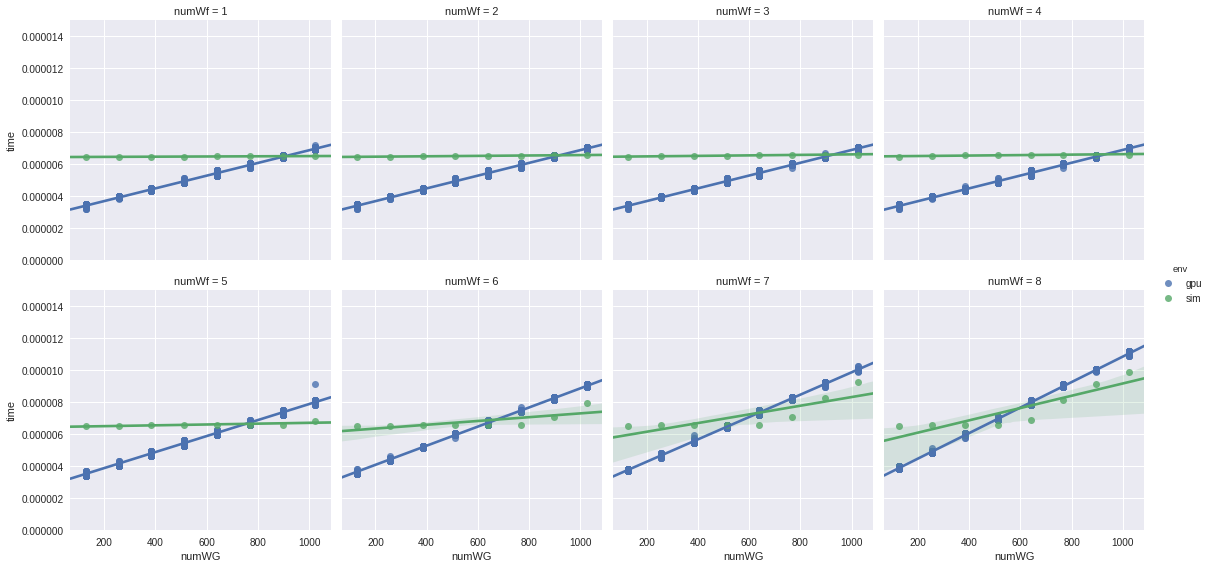

In [54]:
lm = sns.lmplot('numWG', 'time', data, col='numWf', hue='env', col_wrap=4, size=4)
lm.axes[0].set_ylim(0e-5, 1.5e-5)
plt.savefig('empty_kernel.pdf')

In [55]:
data_wf = data[(data['numWf']==1) & (data['env']=='gpu')];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    2.879417e-06
numWG        3.986738e-09
dtype: float64

In [56]:
data_wf = data[(data['numWf']==1) & (data['env']=='sim')];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    6.435143e-06
numWG        6.203497e-11
dtype: float64

In [57]:
data_wf = data[(data['numWf']==2) & (data['env']=='gpu')];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    2.873754e-06
numWG        3.999700e-09
dtype: float64

In [58]:
data_wf = data[(data['numWf']==3) & (data['env']=='gpu')];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    2.873397e-06
numWG        4.008659e-09
dtype: float64

In [59]:
data_wf = data[(data['numWf']==4) & (data['env']=='gpu')];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    2.866376e-06
numWG        4.019799e-09
dtype: float64

In [60]:
data_wf = data[(data['numWf']==5) & (data['env']=='gpu')];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    2.862794e-06
numWG        5.019758e-09
dtype: float64

In [61]:
data_wf = data[(data['numWf']==6) & (data['env']=='gpu')];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    2.872172e-06
numWG        5.996543e-09
dtype: float64

In [62]:
data_wf = data[(data['numWf']==7) & (data['env']=='gpu')];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    2.860988e-06
numWG        7.011785e-09
dtype: float64

In [63]:
data_wf = data[(data['numWf']==8) & (data['env']=='gpu')];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    2.859468e-06
numWG        7.999825e-09
dtype: float64

Conclusion: It takes 4 cycles to launch a workgroup if the number of wavefronts is 4 or less. If there are more than 4 wavefronts in a workgroup, it takes one more cycle per wavefront to dispatch one workgroup.